In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('D:\Basic-Training-Class-Activity\Basics_of_Python\dataset\cardata.csv')

# Data frame Table Info
df.shape

<>:1: SyntaxWarning: invalid escape sequence '\B'
<>:1: SyntaxWarning: invalid escape sequence '\B'
C:\Users\HP\AppData\Local\Temp\ipykernel_16760\4183457840.py:1: SyntaxWarning: invalid escape sequence '\B'
  df = pd.read_csv('D:\Basic-Training-Class-Activity\Basics_of_Python\dataset\cardata.csv')


(11914, 16)

In [5]:
# Check Data type of each columns
df.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

In [6]:
# Drop Irrelevent columns
df = df.drop(['Engine Fuel Type', 'Market Category', 'Vehicle Style', 'Popularity', 'Number of Doors', 'Vehicle Size'], axis=1)

In [7]:
df.head()


,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


In [8]:
df.info

<bound method DataFrame.info of           Make       Model  Year  Engine HP  Engine Cylinders  \
0          BMW  1 Series M  2011      335.0               6.0   
1          BMW    1 Series  2011      300.0               6.0   
2          BMW    1 Series  2011      300.0               6.0   
3          BMW    1 Series  2011      230.0               6.0   
4          BMW    1 Series  2011      230.0               6.0   
...        ...         ...   ...        ...               ...   
11909    Acura         ZDX  2012      300.0               6.0   
11910    Acura         ZDX  2012      300.0               6.0   
11911    Acura         ZDX  2012      300.0               6.0   
11912    Acura         ZDX  2013      300.0               6.0   
11913  Lincoln      Zephyr  2006      221.0               6.0   

      Transmission Type      Driven_Wheels  highway MPG  city mpg   MSRP  
0                MANUAL   rear wheel drive           26        19  46135  
1                MANUAL   rear wheel 

In [9]:
# Rename Lengthy columns name into shorter one
df = df.rename(columns={"Engine HP": "HP", "Engine Cylinders":"Cylinders", "Transmission Type":"Transmission", "highway MPG": "HMPG", "city mpg": "cMPG", "Driven_Wheels": "Drivewheel"})

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Make          11914 non-null  object 
 1   Model         11914 non-null  object 
 2   Year          11914 non-null  int64  
 3   HP            11845 non-null  float64
 4   Cylinders     11884 non-null  float64
 5   Transmission  11914 non-null  object 
 6   Drivewheel    11914 non-null  object 
 7   HMPG          11914 non-null  int64  
 8   cMPG          11914 non-null  int64  
 9   MSRP          11914 non-null  int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 930.9+ KB


In [11]:
# Count no of duplicate rows and columns where duplicate value exist
no_of_duplicates = df[df.duplicated()]
no_of_duplicates.shape

print(f'Duplicate Data (row*col): {no_of_duplicates.shape}')
print(f'Original Data (row*col): {df.shape}')

Duplicate Data (row*col): (989, 10)
Original Data (row*col): (11914, 10)


In [12]:
df.count()

Make            11914
Model           11914
Year            11914
HP              11845
Cylinders       11884
Transmission    11914
Drivewheel      11914
HMPG            11914
cMPG            11914
MSRP            11914
dtype: int64

In [13]:
df = df.drop_duplicates()
df.shape

(10925, 10)

In [14]:
# Check no of Null Values
total_null_values = df.isnull().sum()
total_null_values

Make             0
Model            0
Year             0
HP              69
Cylinders       30
Transmission     0
Drivewheel       0
HMPG             0
cMPG             0
MSRP             0
dtype: int64

In [15]:
# drop null values
df = df.dropna()
df.shape

(10827, 10)

In [16]:
# Re Check no of Null Values
total_null_values = df.isnull().sum()
total_null_values

Make            0
Model           0
Year            0
HP              0
Cylinders       0
Transmission    0
Drivewheel      0
HMPG            0
cMPG            0
MSRP            0
dtype: int64

In [17]:
# We Got PERFECT DATA 
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10827 entries, 0 to 11913
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Make          10827 non-null  object 
 1   Model         10827 non-null  object 
 2   Year          10827 non-null  int64  
 3   HP            10827 non-null  float64
 4   Cylinders     10827 non-null  float64
 5   Transmission  10827 non-null  object 
 6   Drivewheel    10827 non-null  object 
 7   HMPG          10827 non-null  int64  
 8   cMPG          10827 non-null  int64  
 9   MSRP          10827 non-null  int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 930.4+ KB


In [18]:
# Now Find Outliers

# First Find IQR for all numeric columns
Q1 = df.quantile(0.25, numeric_only=True)
Q3 = df.quantile(0.75, numeric_only=True)

IQR = Q3 - Q1
print(IQR)

Year             9.0
HP             130.0
Cylinders        2.0
HMPG             8.0
cMPG             6.0
MSRP         21327.5
dtype: float64


<Axes: xlabel='Year'>

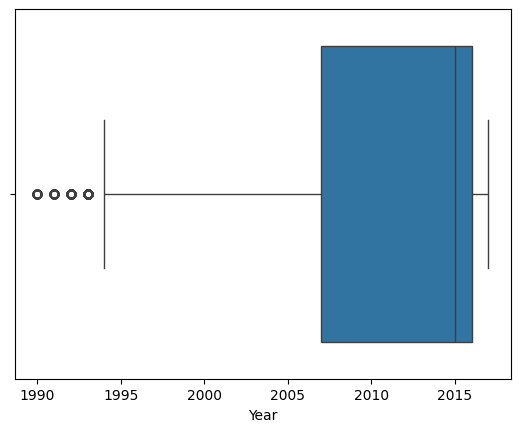

In [19]:
import seaborn as sns
sns.boxplot(x=df['Year'])

# arr = ['Year', 'HP', 'Cylinders', 'HMPG', 'cMPG', 'MSRP']

# for item in arr:
#     sns.boxplot(x=df[item])

<Axes: xlabel='HP'>

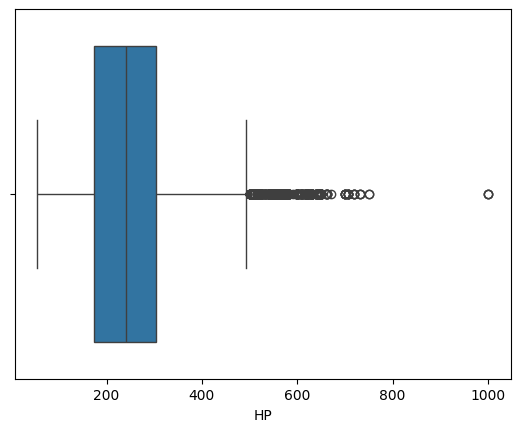

In [20]:
sns.boxplot(x=df['HP'])

<Axes: xlabel='Cylinders'>

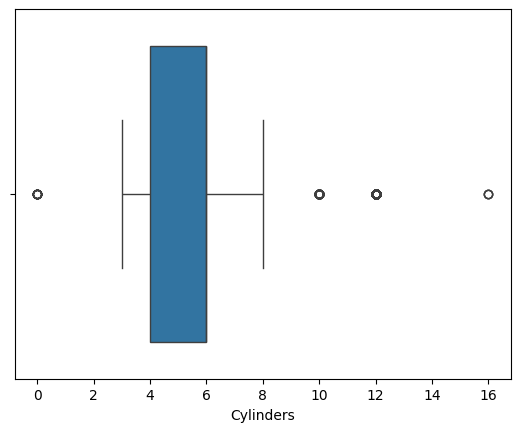

In [21]:
sns.boxplot(x=df['Cylinders'])

<Axes: xlabel='HMPG'>

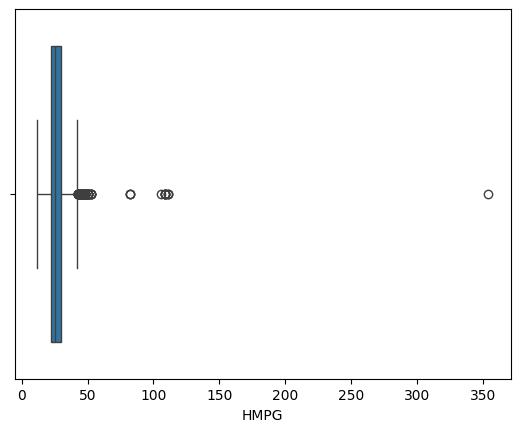

In [22]:
sns.boxplot(x=df['HMPG'])

<Axes: xlabel='cMPG'>

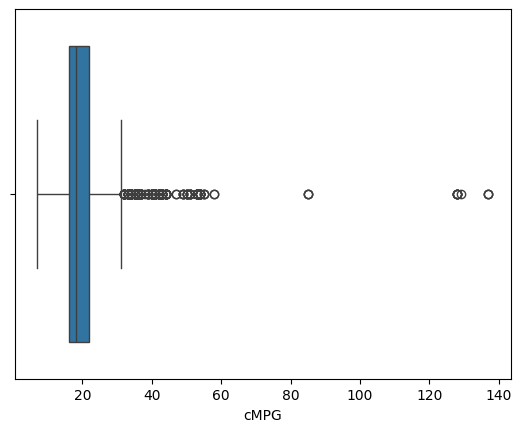

In [23]:
sns.boxplot(x=df['cMPG'])

<Axes: xlabel='MSRP'>

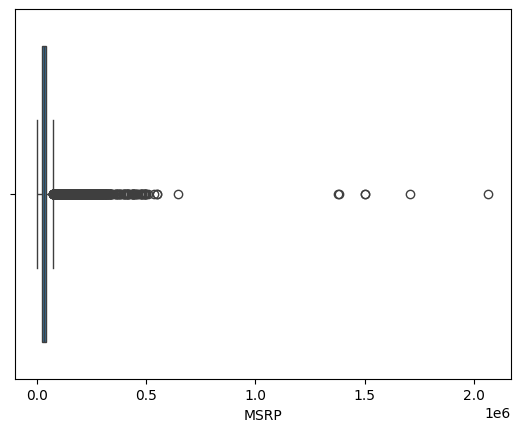

In [24]:
sns.boxplot(x=df['MSRP'])

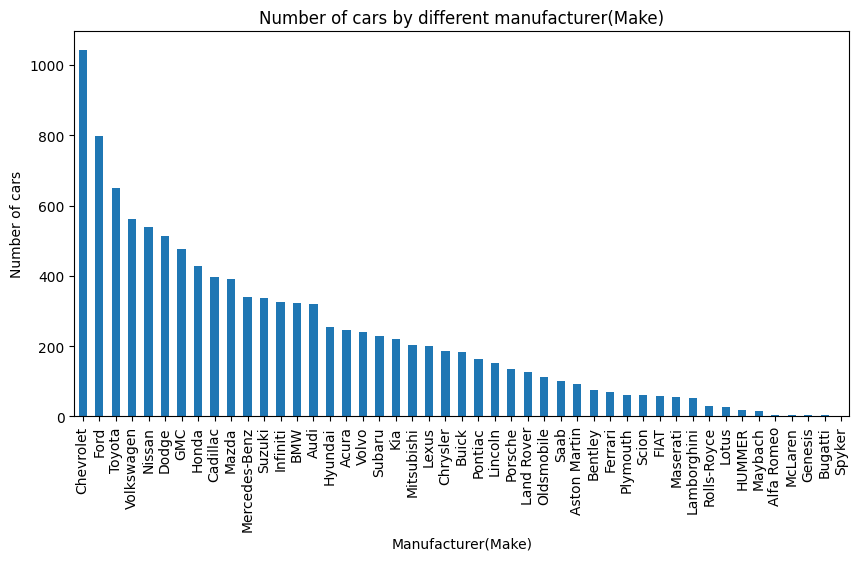

In [25]:
# Make bar graph
df.Make.value_counts().nlargest(100).plot(kind='bar', figsize=(10,5))

plt.title("Number of cars by different manufacturer(Make)")
plt.ylabel("Number of cars")
plt.xlabel("Manufacturer(Make)")

plt.show()

In [26]:
# Drop columns which have Object datatype
df.dtypes

Make             object
Model            object
Year              int64
HP              float64
Cylinders       float64
Transmission     object
Drivewheel       object
HMPG              int64
cMPG              int64
MSRP              int64
dtype: object

In [27]:
df = df.drop(['Make', 'Model', 'Transmission', 'Drivewheel'], axis = 1)

,Year,HP,Cylinders,HMPG,cMPG,MSRP
Year,1.000000,0.314971,-0.050598,0.284237,0.234135,0.196789
HP,0.314971,1.000000,0.788007,-0.420281,-0.473551,0.659835
Cylinders,-0.050598,0.788007,1.000000,-0.611576,-0.632407,0.554740
HMPG,0.284237,-0.420281,-0.611576,1.000000,0.841229,-0.209150
cMPG,0.234135,-0.473551,-0.632407,0.841229,1.000000,-0.234050
MSRP,0.196789,0.659835,0.554740,-0.209150,-0.234050,1.000000


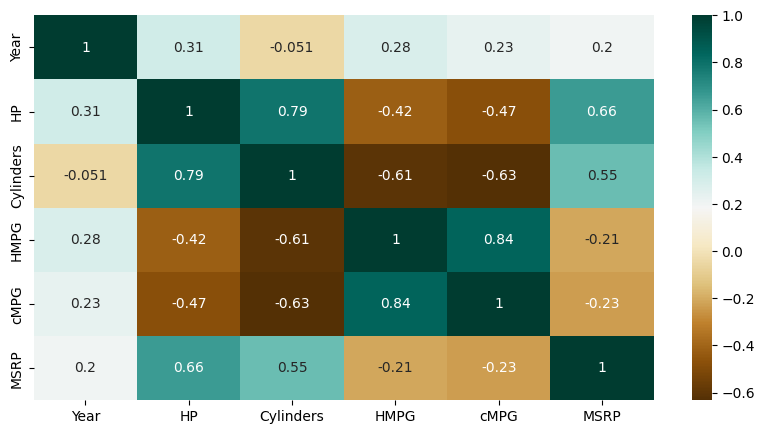

In [28]:
# Heatmap co-relations: Only for numeric data types, thats why we removed object data type columns

plt.figure(figsize=(10,5))
c = df.corr()
sns.heatmap(c, cmap="BrBG", annot=True)
c

In [29]:
df['Year']

0        2011
1        2011
2        2011
3        2011
4        2011
         ... 
11909    2012
11910    2012
11911    2012
11912    2013
11913    2006
Name: Year, Length: 10827, dtype: int64

In [30]:
df['HP']

0        335.0
1        300.0
2        300.0
3        230.0
4        230.0
         ...  
11909    300.0
11910    300.0
11911    300.0
11912    300.0
11913    221.0
Name: HP, Length: 10827, dtype: float64

In [32]:
df[['Year', 'HP']]

,Year,HP
0,2011,335.0
1,2011,300.0
2,2011,300.0
3,2011,230.0
4,2011,230.0
...,...,...
11909,2012,300.0
11910,2012,300.0
11911,2012,300.0
11912,2013,300.0


In [35]:
df['multiplication'] = df['Year']*df['HP']
df['division'] = df['Year']/df['HP']
df['addition'] = df['Year']+df['HP']
df['substraction'] = df['Year']-df['HP']

df[['Year', 'HP', 'addition', 'substraction', 'multiplication', 'division']]

,Year,HP,addition,substraction,multiplication,division
0,2011,335.0,2346.0,1676.0,673685.0,6.002985
1,2011,300.0,2311.0,1711.0,603300.0,6.703333
2,2011,300.0,2311.0,1711.0,603300.0,6.703333
3,2011,230.0,2241.0,1781.0,462530.0,8.743478
4,2011,230.0,2241.0,1781.0,462530.0,8.743478
...,...,...,...,...,...,...
11909,2012,300.0,2312.0,1712.0,603600.0,6.706667
11910,2012,300.0,2312.0,1712.0,603600.0,6.706667
11911,2012,300.0,2312.0,1712.0,603600.0,6.706667
11912,2013,300.0,2313.0,1713.0,603900.0,6.710000
